In [52]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [53]:
df_Est = pd.read_excel('ejercicio de regresion_orig.xlsx')
df_Est.head()

,red solidos,red oxigeno
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16


In [54]:
df_Est.shape

(33, 2)

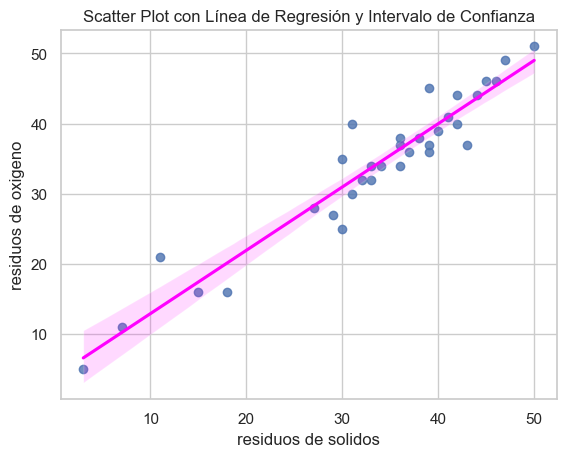

In [55]:
# DataFrame llamado df_Est
sns.regplot(data=df_Est, y='red oxigeno', x='red solidos', ci=95, line_kws={'color': 'magenta'}) 
# El argumento ci controla el intervalo de confianza
plt.ylabel('residuos de oxigeno')
plt.xlabel('residuos de solidos')
plt.title('Scatter Plot con Línea de Regresión y Intervalo de Confianza')
plt.show()

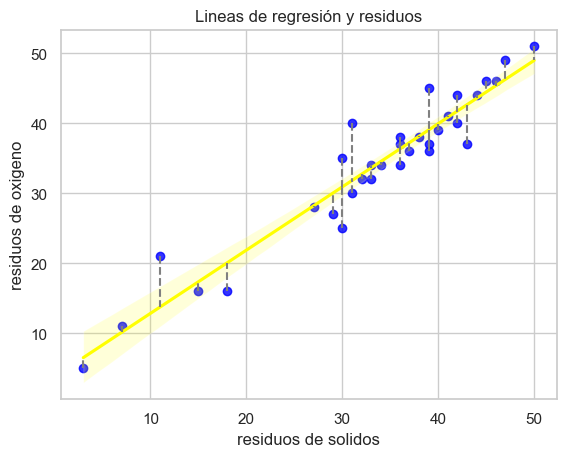

In [56]:
sns.set(style='whitegrid')  # Configuración del estilo del gráfico

# Agregar una columna de constante al DataFrame
df_Est['constante'] = 1

# Crear el gráfico de dispersión con la línea de regresión
sns.regplot(data=df_Est, y='red oxigeno', x='red solidos', ci=95, line_kws={'color': 'yellow'}, scatter_kws={'color': 'blue'})  # El argumento ci controla el intervalo de confianza

# Ajustar el modelo de regresión lineal
y = df_Est['red oxigeno']
X = df_Est[['red solidos', 'constante']]  # 'constante' es la columna que agregamos para el término constante
modelo = sm.OLS(y, X).fit()

# Calcular las predicciones a partir del modelo
df_Est['red oxigeno_pred'] = modelo.predict(X)

# Agregar líneas que conecten cada punto a la línea de regresión
for i in range(len(df_Est)):
    x_point = df_Est['red solidos'][i]
    y_point = df_Est['red oxigeno'][i]
    y_pred = df_Est['red oxigeno_pred'][i]  # Usamos las predicciones del modelo
    
    # Línea que conecta el punto a la línea de regresión
    plt.plot([x_point, x_point], [y_point, y_pred], linestyle='--', color='gray')

plt.ylabel('residuos de oxigeno')
plt.xlabel('residuos de solidos')
plt.title('Lineas de regresión y residuos')
plt.show()

In [57]:
# Eliminar filas con valores NaN
df_Est.dropna(subset=['red oxigeno', 'red solidos'])

# Agregar una columna de constantes para el término constante en el modelo
df_Est['constante'] = 1

# Definir las variables dependiente e independiente
y = df_Est['red oxigeno']
X = df_Est[['constante', 'red solidos']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            red oxigeno   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     325.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.48e-18
Time:                        21:13:19   Log-Likelihood:                -84.481
No. Observations:                  33   AIC:                             173.0
Df Residuals:                      31   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constante       3.8296      1.768      2.166      

In [58]:
promedio_solidos = df_Est['red solidos'].mean()
sd_solidos = df_Est['red solidos'].std()
promedio_oxigeno = df_Est['red oxigeno'].mean()
sd_oxigeno = df_Est['red oxigeno'].std()

resumen_estadistico = pd.DataFrame({
    'promedio_solidos': [promedio_solidos],
    'sd_solidos': [sd_solidos],
    'promedio_oxigeno': [promedio_oxigeno],
    'sd_oxigeno': [sd_oxigeno]
})

resumen_estadistico.head()

,promedio_solidos,sd_solidos,promedio_oxigeno,sd_oxigeno
0,33.454545,11.391035,34.060606,10.773055


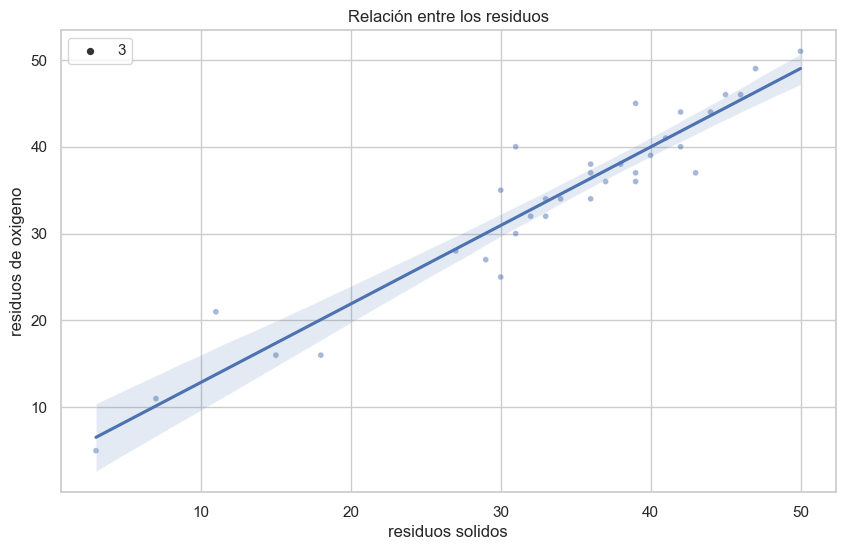

In [59]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.scatterplot(data=df_Est, x='red solidos', y='red oxigeno', alpha=0.5, size=3)
sns.regplot(data=df_Est, x='red solidos', y='red oxigeno', scatter=False)

plt.xlabel("residuos solidos")
plt.ylabel("residuos de oxigeno")
plt.title("Relación entre los residuos")

# Mostrar el gráfico
plt.show()

In [60]:
# Calcular el coeficiente de correlación de Pearson (rho) 

x = df_Est['red solidos']  # Datos variable independiente
y = df_Est['red oxigeno']  # Datos variable dependiente

rho = np.mean((x - np.mean(x)) * (y - np.mean(y))) / (np.std(x) * np.std(y))

print(rho)

0.9554793566657453


Media de la Reduccion de solidos (Estandarizada): 1.4130111222501992e-16
Desviación Estándar de la Reducción de solidos (Estandarizada): 1.0
Media de la Reducción de solidos: 33.45454545454545
Desviación Estándar de la Reducción de solidos: 11.391035151301299


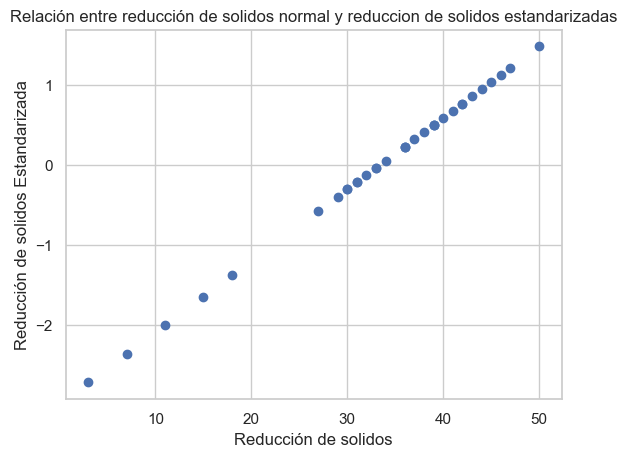

In [61]:
# Calcular la media y la desviación estándar de la variable
mean_scaled_solidos = StandardScaler().fit_transform(df_Est[['red solidos']]).mean()
sd_scaled_solidos = StandardScaler().fit_transform(df_Est[['red solidos']]).std()

mean_solidos = df_Est['red solidos'].mean()
sd_solidos = df_Est['red solidos'].std()

print("Media de la Reduccion de solidos (Estandarizada):", mean_scaled_solidos)
print("Desviación Estándar de la Reducción de solidos (Estandarizada):", sd_scaled_solidos)
print("Media de la Reducción de solidos:", mean_solidos)
print("Desviación Estándar de la Reducción de solidos:", sd_solidos)

# Crear el gráfico de dispersión
plt.scatter(df_Est['red solidos'], StandardScaler().fit_transform(df_Est[['red solidos']]))
plt.xlabel("Reducción de solidos")
plt.ylabel("Reducción de solidos Estandarizada")
plt.title("Relación entre reducción de solidos normal y reduccion de solidos estandarizadas")
plt.show()


In [62]:
correlation_coefficient = df_Est[['red solidos', 'red oxigeno']].corr().iloc[0, 1]
print("Coeficiente de Correlación:", correlation_coefficient)

Coeficiente de Correlación: 0.9554793566657453


In [63]:
# Seleccionar una muestra aleatoria de tamaño 75 con reemplazo
R = df_Est.sample(n=7, replace=True)

# Calcular el coeficiente de correlación entre las columnas "father" y "son"
correlation_coefficient = R[['red solidos', 'red oxigeno']].corr().iloc[0, 1]

print("Coeficiente de Correlación en la Muestra:", correlation_coefficient)


Coeficiente de Correlación en la Muestra: 0.9819959366279228


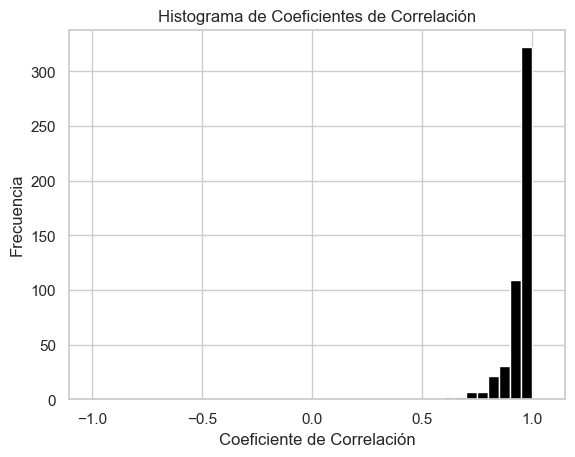

In [64]:
B = 500
N = 8
R = np.zeros(B)

for i in range(B):
    sample = df_Est.sample(n=N, replace=False)
    correlation_coefficient = sample[['red solidos', 'red oxigeno']].corr().iloc[0, 1]
    R[i] = correlation_coefficient

# Crear un histograma de los coeficientes de correlación
plt.hist(R, bins=np.arange(-1, 1.1, 0.05), color='black')
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Frecuencia")
plt.title("Histograma de Coeficientes de Correlación")
plt.show()

In [65]:
mean_R = np.mean(R)
print("Media de Coeficientes de Correlación:", mean_R)

Media de Coeficientes de Correlación: 0.9443858225891522


In [66]:
sd_R = np.std(R)
print("Desviación Estándar de Coeficientes de Correlación:", sd_R)

Desviación Estándar de Coeficientes de Correlación: 0.05909828211653341


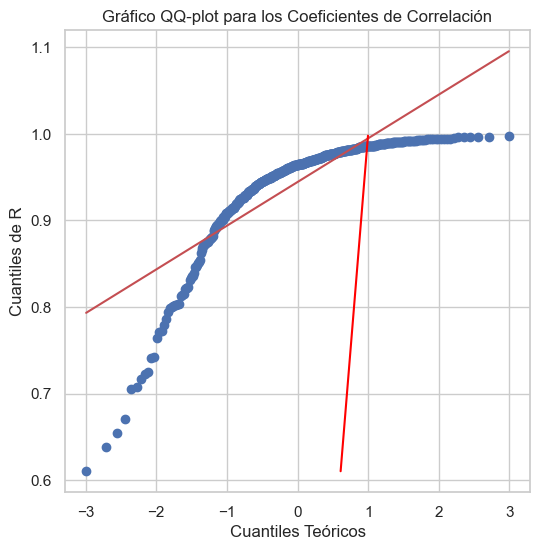

In [67]:
# Crear un DataFrame con los coeficientes de correlación
df_R = pd.DataFrame({'R': R})

# Calcular la media y el tamaño de la muestra
mean_R = np.mean(R)
N = len(R)

# Crear el gráfico QQ-plot
plt.figure(figsize=(6, 6))
stats.probplot(df_R['R'], dist='norm', plot=plt)
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de R")
plt.title("Gráfico QQ-plot para los Coeficientes de Correlación")
plt.plot([np.min(R), np.max(R)], [np.min(R), np.max(R)], color='red')  # Línea de referencia
plt.show()